In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [153]:
data=pd.read_csv(r'C:\Users\HP\Documents\NareshIT\Loan Prediction analytics vidya\DataFiles\test_lAUu6dG.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [154]:
loan_ids = data['Loan_ID']  # save this column

In [155]:
data['Dependents']=data['Dependents'].replace('3+',3)

In [156]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [157]:
missing_value_list=['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in missing_value_list:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [158]:
import warnings
warnings.filterwarnings('ignore')
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [159]:
data['Dependents']=data['Dependents'].astype(int)

In [160]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [161]:
# outlier data
LoanAmount_df=data['ApplicantIncome']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
con1=q1-1.5*iqr > LoanAmount_df
con2=q3+1.5*iqr < LoanAmount_df
con=con1|con2
outlier_data=data[con]
len(outlier_data)

32

In [162]:
# outlier data
LoanAmount_df=data['ApplicantIncome']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
con1=q1-1.5*iqr > LoanAmount_df
con2=q3+1.5*iqr < LoanAmount_df
con=con1|con2
outlier_data=data[con]
len(outlier_data)

32

In [163]:

ApplicantIncome_df=data['ApplicantIncome']

ApplicantIncome_median=data['ApplicantIncome'].median()
con=(ApplicantIncome_df<lb)| (ApplicantIncome_df>ub)
true=ApplicantIncome_median
false=ApplicantIncome_df
data['ApplicantIncome']=np.where(con,true,false)

In [164]:
# outlier data
LoanAmount_df=data['CoapplicantIncome']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
con1=q1-1.5*iqr > LoanAmount_df
con2=q3+1.5*iqr < LoanAmount_df
con=con1|con2
outlier_data=data[con]
len(outlier_data)

8

In [165]:

CoapplicantIncome_df=data['CoapplicantIncome']

CoapplicantIncome_median=data['CoapplicantIncome'].mean()
con=(CoapplicantIncome_df<lb)| (CoapplicantIncome_df>ub)
true=CoapplicantIncome_median
false=CoapplicantIncome_df
data['CoapplicantIncome']=np.where(con,true,false)

In [166]:
# wage_data=visa_df['prevailing_wage']
LoanAmount_df=data['LoanAmount']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [167]:

LoanAmount_df=data['LoanAmount']

LoanAmount_median=data['LoanAmount'].median()
con=(LoanAmount_df<lb)| (LoanAmount_df>ub)
true=LoanAmount_median
false=LoanAmount_df
data['LoanAmount']=np.where(con,true,false)

{'whiskers': [<matplotlib.lines.Line2D at 0x1551131c290>,
 'caps': [<matplotlib.lines.Line2D at 0x1551131cc80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1551131c530>],
 'medians': [<matplotlib.lines.Line2D at 0x1551131d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1551131d3d0>],
 'means': []}

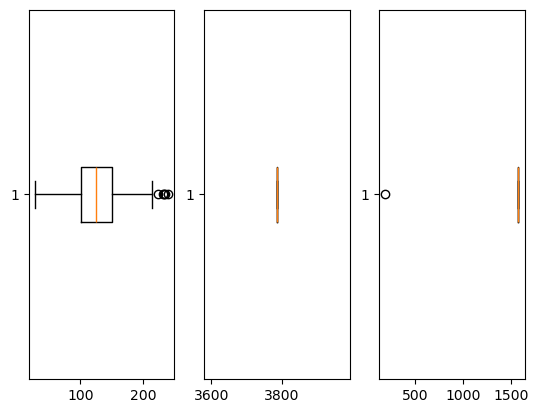

In [168]:
plt.subplot(1,3,1).boxplot(data['LoanAmount'],vert=False)
plt.subplot(1,3,2).boxplot(data['ApplicantIncome'],vert=False)
plt.subplot(1,3,3).boxplot(data['CoapplicantIncome'],vert=False)

In [169]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.0,367.000000,367.000000,367.000000,367.000000
mean,0.806540,3786.0,1565.810415,126.207084,342.822888,0.839237
std,1.065177,0.0,72.169966,39.661555,64.658402,0.367814
min,0.000000,3786.0,187.000000,28.000000,6.000000,0.000000
25%,0.000000,3786.0,1569.577657,101.000000,360.000000,1.000000
50%,0.000000,3786.0,1569.577657,125.000000,360.000000,1.000000
75%,2.000000,3786.0,1569.577657,150.000000,360.000000,1.000000
max,3.000000,3786.0,1569.577657,240.000000,480.000000,1.000000


In [170]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in cols:
    data[col] = le.fit_transform(data[col])
    data1=data

In [171]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,3786.0,1569.577657,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3786.0,1569.577657,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,3786.0,1569.577657,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,3786.0,1569.577657,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3786.0,1569.577657,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,3786.0,1569.577657,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,3786.0,1569.577657,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3786.0,1569.577657,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,3786.0,1569.577657,158.0,360.0,1.0,0


In [172]:
data.drop('Loan_ID',axis=1,inplace=True)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data
data2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [174]:
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.0,0.052271,-0.409192,0.266022,0.437674,1.118764
1,0.485479,0.758358,0.181871,-0.544812,-0.334845,0.0,0.052271,-0.005228,0.266022,0.437674,1.118764
2,0.485479,0.758358,1.121964,-0.544812,-0.334845,0.0,0.052271,2.065087,0.266022,0.437674,1.118764
3,0.485479,0.758358,1.121964,-0.544812,-0.334845,0.0,0.052271,-0.661670,0.266022,0.437674,1.118764
4,0.485479,-1.318638,-0.758222,1.835497,-0.334845,0.0,0.052271,-1.217121,0.266022,0.437674,1.118764
...,...,...,...,...,...,...,...,...,...,...,...
362,0.485479,0.758358,2.062056,1.835497,2.986456,0.0,0.052271,-0.333449,0.266022,0.437674,1.118764
363,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.0,0.052271,-0.282954,0.266022,0.437674,1.118764
364,0.485479,-1.318638,-0.758222,-0.544812,-0.334845,0.0,0.052271,-0.005228,0.266022,0.437674,-0.095989
365,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.0,0.052271,0.802700,0.266022,0.437674,-1.310741


In [175]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [176]:
data3=pca.transform(X)

In [177]:
len(data3[0]),len(data3)

(10, 367)

In [187]:
data3

array([[ 1.05242741e+01,  1.11203151e+01, -1.83742530e+01, ...,
        -2.98666324e-02, -5.06195018e-02, -9.18910290e-02],
       [ 1.07280304e+01,  1.36941297e+01, -2.58193703e+00, ...,
         2.84788974e-02,  1.16858993e-02, -9.90859156e-02],
       [ 1.17790546e+01,  2.68841766e+01,  7.83450064e+01, ...,
         1.43386809e-01,  3.85203753e-02, -1.49205329e-01],
       ...,
       [ 1.07296943e+01,  1.36934036e+01, -2.58330559e+00, ...,
         1.89298680e-01,  4.36647535e-01, -1.72261376e-01],
       [ 1.11402656e+01,  1.88411670e+01,  2.90003303e+01, ...,
         4.09098639e-02, -8.84444833e-02, -2.16731226e-01],
       [-6.63734741e+01, -1.51348746e+02, -3.04991693e+00, ...,
         3.58536579e-01,  4.10219678e-01,  7.52344367e-01]])

In [179]:
import joblib
best_model = joblib.load("loan_model.pkl")
# test_predictions = best_model.predict(test_scaled)

In [180]:
predictions = best_model.predict(data2)

In [181]:
data2['Loan_Status']=predictions

In [182]:
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.0,0.052271,-0.409192,0.266022,0.437674,1.118764,1
1,0.485479,0.758358,0.181871,-0.544812,-0.334845,0.0,0.052271,-0.005228,0.266022,0.437674,1.118764,1
2,0.485479,0.758358,1.121964,-0.544812,-0.334845,0.0,0.052271,2.065087,0.266022,0.437674,1.118764,1
3,0.485479,0.758358,1.121964,-0.544812,-0.334845,0.0,0.052271,-0.661670,0.266022,0.437674,1.118764,1
4,0.485479,-1.318638,-0.758222,1.835497,-0.334845,0.0,0.052271,-1.217121,0.266022,0.437674,1.118764,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.485479,0.758358,2.062056,1.835497,2.986456,0.0,0.052271,-0.333449,0.266022,0.437674,1.118764,1
363,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.0,0.052271,-0.282954,0.266022,0.437674,1.118764,1
364,0.485479,-1.318638,-0.758222,-0.544812,-0.334845,0.0,0.052271,-0.005228,0.266022,0.437674,-0.095989,1
365,0.485479,0.758358,-0.758222,-0.544812,-0.334845,0.0,0.052271,0.802700,0.266022,0.437674,-1.310741,1


In [183]:
data2['Loan_Status'].value_counts()

Loan_Status
1    308
0     59
Name: count, dtype: int64

In [193]:
submission = pd.DataFrame({
    'Loan_ID' : loan_ids, 
    'Loan_Status': ['Y' if pred == 1 else 'N' for pred in predictions]
})
submission.to_csv("Loan_prediction.csv", index=False)

In [194]:
sub=pd.read_csv('Loan_prediction.csv')

In [195]:
sub['Loan_Status'].value_counts()

Loan_Status
Y    308
N     59
Name: count, dtype: int64